# **Análisis Exploratio de Datos**

#### **Conociendo mejor el conjunto de datos y respondiendo preguntas.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

----

**Cargar el conjunto de datos**

In [3]:
df_vehicle_price = pd.read_csv('../data/processed/vehicle_price.csv')
df_vehicle_price.head(5)

Unnamed: 0        make       model  year  mileage  engine_hp transmission  \
0           0  Volkswagen       Jetta  2016   183903        173       Manual   
1           1       Lexus          RX  2010   236643        352       Manual   
2           2      Subaru   Crosstrek  2016   103199        188    Automatic   
3           3    Cadillac       Lyriq  2016   118889        338       Manual   
4           4      Toyota  Highlander  2018   204170        196       Manual   

  fuel_type drivetrain body_type  ... interior_color owner_count  \
0  Electric        RWD     Sedan  ...          Brown           5   
1  Gasoline        FWD     Sedan  ...          Beige           5   
2    Diesel        AWD     Sedan  ...          Beige           5   
3  Gasoline        AWD       SUV  ...           Gray           3   
4    Diesel        FWD     Sedan  ...          Brown           5   

   accident_history seller_type  condition     trim vehicle_age  \
0       No Accident      Dealer  Excellent       EX           9   
1             Minor      Dealer       Good       LX          15   
2       No Accident      Dealer  Excellent  Touring           9   
3       No Accident     Private       Good     Base           9   
4             Minor      Dealer  Excellent    Sport           7   

   mileage_per_year  brand_popularity     price  
0      20433.666667          0.040054   7208.52  
1      15776.200000          0.039921   6911.81  
2      11466.555556          0.040230  11915.63  
3      13209.888889          0.039847  25984.79  
4      29167.142857          0.039627   8151.30  

[5 rows x 21 columns]

**Identificar cuales columnas creemos que pueden tener un impacto en el valor del precio del vehiculo**

In [4]:
df_vehicle_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1000000 non-null  int64  
 1   make              1000000 non-null  object 
 2   model             1000000 non-null  object 
 3   year              1000000 non-null  int64  
 4   mileage           1000000 non-null  int64  
 5   engine_hp         1000000 non-null  int64  
 6   transmission      1000000 non-null  object 
 7   fuel_type         1000000 non-null  object 
 8   drivetrain        1000000 non-null  object 
 9   body_type         1000000 non-null  object 
 10  exterior_color    1000000 non-null  object 
 11  interior_color    1000000 non-null  object 
 12  owner_count       1000000 non-null  int64  
 13  accident_history  1000000 non-null  object 
 14  seller_type       1000000 non-null  object 
 15  condition         1000000 non-null  object 
 16  t

Las columnas que pueden llegar a influir en el precio del vehiculo son las siguientes:
- make o model
- year
- mileage
- fuel_type
- ower_count
- condition

Para confirmar nuestra intuisión realizaremos una **matriz de correlación** para confirmar si es verdad o no.

**Matriz de Correlación**

In [13]:
# Eliminar colummna inecesaria
df_vehicle_price = df_vehicle_price.drop('Unnamed: 0', axis=1)

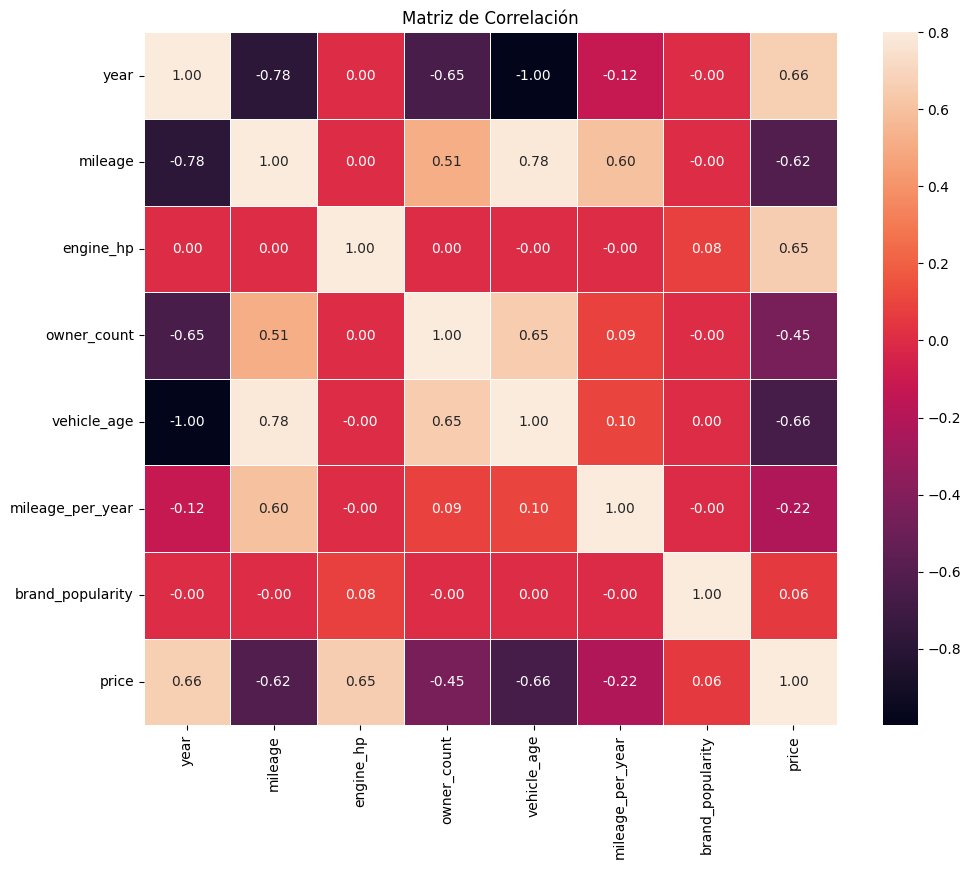

In [17]:
corrmat = df_vehicle_price.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Columnas correlacionadas:
- Price y year: 0.66
- price y engine_hp: 0.65
- mileage_per_year y mileage: 0.60
- vehicle_age y mileage: 0.78
- vehicle_age y owner_count: 0.65
- ower_count y mileage: 0.51

Estas correlaciones aplican solo a las columnas númericas por lo que las columnas categoricas estan descartadas, pero para evitrar que se nos pase una correlación con las variables categoricas realizaremos una matriz de correlación que incluya todas las columnas.

In [18]:
# Mapeo para la columna Ordinal
orden_condicion = {
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
}

# Aplicar el mapeo al DataFrame
df_vehicle_price['condition_encoded'] = df_vehicle_price['condition'].map(orden_condicion)

In [20]:
# Columnas para One-Hot Encoding
cols_to_onehot = [
    'transmission', 'fuel_type', 'drivetrain', 'body_type', 
    'exterior_color', 'interior_color', 'accident_history', 
    'seller_type', 'trim'
]

# Crear las nuevas columnas binarias
df_dummies = pd.get_dummies(df_vehicle_price[cols_to_onehot], drop_first=True)

# Eliminar las columnas originales que ya fueron codificadas
df_vehicle_price = df_vehicle_price.drop(columns=cols_to_onehot)

# Unir las nuevas columnas codificadas al DataFrame
df_final = pd.concat([df_vehicle_price, df_dummies], axis=1)

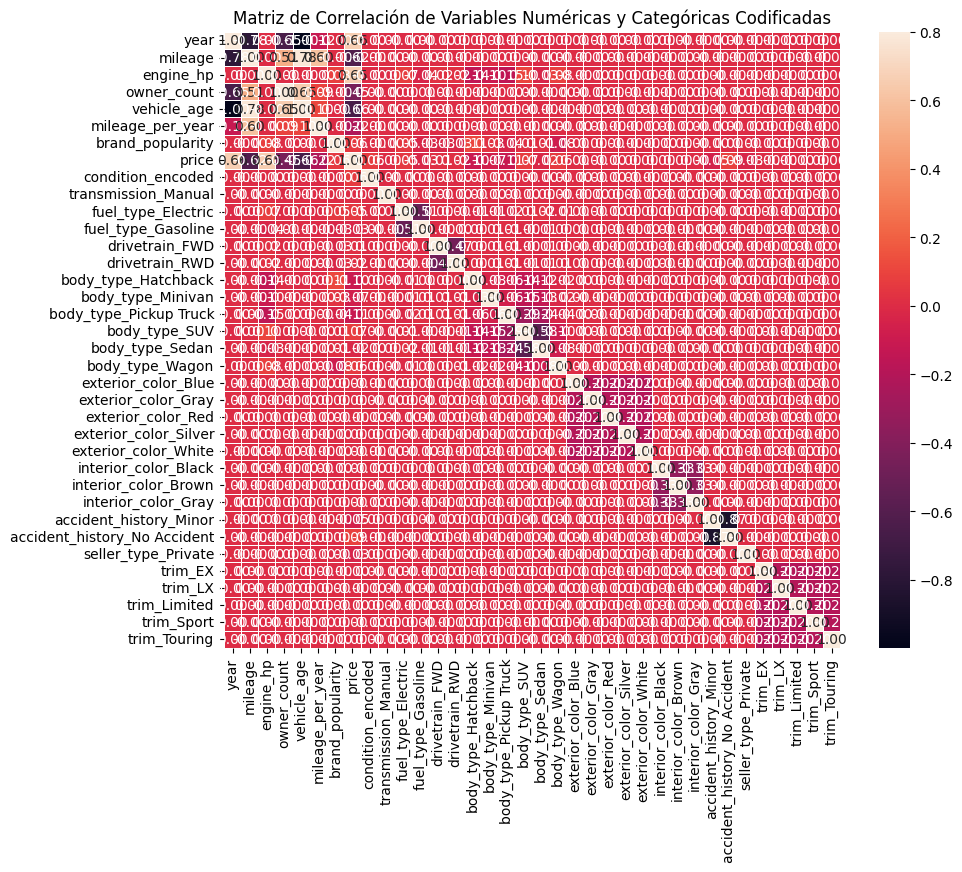

In [21]:
corrmat = df_final.corr(numeric_only=True)

# Visualizar el mapa de calor
f, ax = plt.subplots(figsize=(10, 8)) 
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas y Categóricas Codificadas')
plt.show()

**Filtramos solo las correlaciones más relevantes**

In [22]:
# 1. Extraer las correlaciones de la variable 'price'
price_correlations = corrmat['price'].sort_values(ascending=False)

# 2. Imprimir las correlaciones para revisar los valores
print("Correlaciones con el Precio:\n", price_correlations)

# 3. Determinar un umbral de correlación (ej. |r| > 0.1)
umbral = 0.1 
relevantes = price_correlations[abs(price_correlations) > umbral].index.tolist()

# print("\nVariables con Correlación Absoluta > {}: \n".format(umbral), relevantes)

Correlaciones con el Precio:
 price                           1.000000
year                            0.664730
engine_hp                       0.653339
accident_history_No Accident    0.085387
body_type_SUV                   0.073637
condition_encoded               0.062342
body_type_Wagon                 0.056530
brand_popularity                0.055940
fuel_type_Electric              0.049358
drivetrain_RWD                  0.016100
drivetrain_FWD                  0.014426
interior_color_Black            0.002057
trim_Touring                    0.001493
transmission_Manual             0.001389
exterior_color_White            0.000735
interior_color_Brown            0.000735
exterior_color_Gray             0.000618
interior_color_Gray             0.000573
exterior_color_Blue             0.000188
exterior_color_Silver           0.000187
trim_Sport                      0.000078
exterior_color_Red             -0.000187
trim_LX                        -0.000539
trim_Limited               

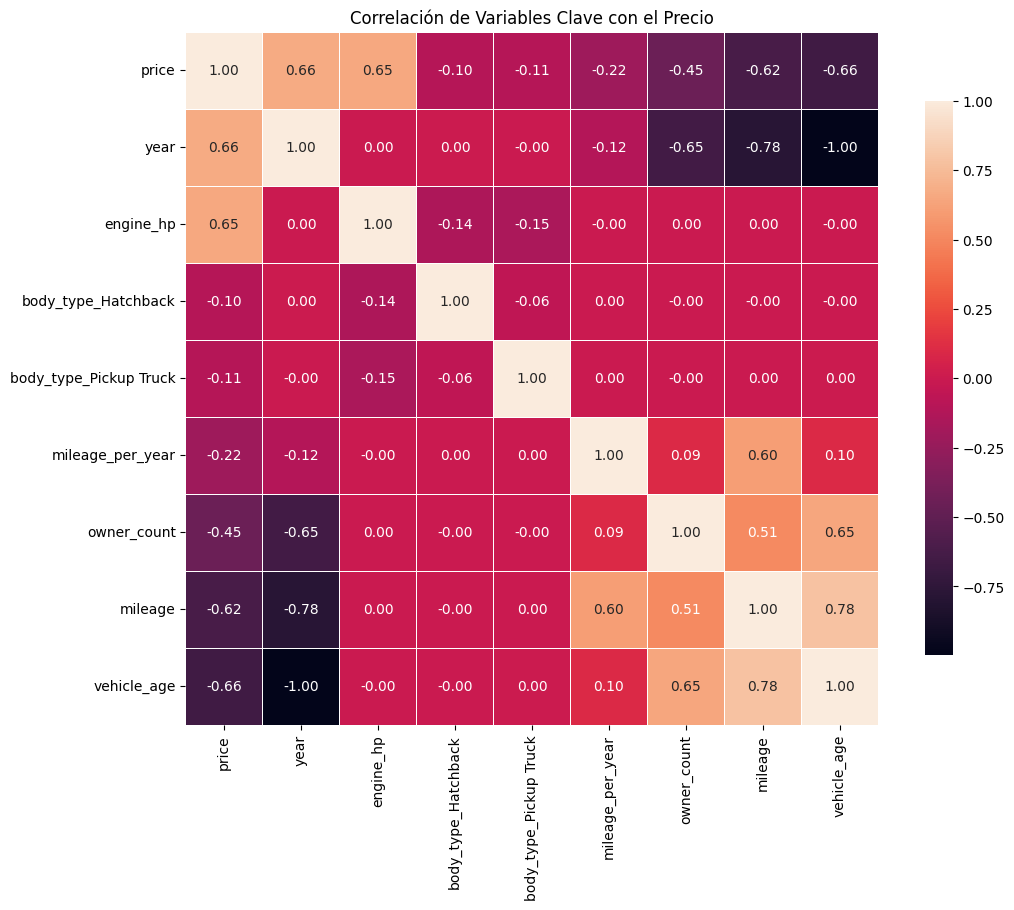

In [24]:
# Seleccionar las columnas relevantes del DataFrame original
df_reducido = df_final[relevantes]

# Calcular la nueva matriz de correlación solo con las variables seleccionadas
corrmat_reducida = df_reducido.corr()

# Visualizar el nuevo mapa de calor
f, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(corrmat_reducida, 
            annot=True, # Mostrar los valores de correlación
            fmt=".2f",  # Formato con dos decimales
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .8})

plt.title('Correlación de Variables Clave con el Precio')
plt.show()

Columnas correlacionadas:
- Price y year: 0.66
- price y engine_hp: 0.65
- mileage_per_year y mileage: 0.60
- vehicle_age y mileage: 0.78
- vehicle_age y owner_count: 0.65
- ower_count y mileage: 0.51

En ambos casos obtuvimos las mismas relación por que en nuestro analisis nos centraremos en dichas relaciones.